<a href="https://colab.research.google.com/github/MarlonMagest/Projeto-ML/blob/main/premier_marlon_seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# – Seminário Teórico: Árvore de Decisão para Previsão de Resultados na Premier League

## 1. Introdução ao Aprendizado Supervisionado

O aprendizado de máquina supervisionado é uma abordagem da inteligência artificial que utiliza dados históricos rotulados para treinar modelos capazes de fazer previsões sobre novos casos.

Dentre os diversos problemas que essa técnica pode resolver, um dos mais comuns é a **classificação**, que consiste em prever categorias com base em variáveis explicativas. No presente projeto, o objetivo é prever o resultado de uma partida de futebol — **vitória, empate ou derrota** — a partir de dados estatísticos dos jogos da Premier League.

---

## 2. Árvore de Decisão: Conceito e Funcionamento

A **Árvore de Decisão** é um algoritmo supervisionado baseado em uma estrutura hierárquica. Ela simula uma série de decisões em formato de árvore, onde:

- Cada **nó interno** representa uma condição de divisão baseada em uma variável (ex: “xG > 1.5?”)
- Cada **ramo** representa uma das saídas possíveis dessa condição (ex: sim ou não)
- Cada **nó folha** representa uma decisão final (ex: Vitória)

O processo de construção da árvore é recursivo e tem como objetivo dividir os dados em subconjuntos cada vez mais homogêneos em relação à variável de interesse.

---

## 3. Principais Parâmetros do Modelo

O comportamento da Árvore de Decisão é controlado por **hiperparâmetros**, que influenciam seu desempenho e sua capacidade de generalização. Os principais são:

- `criterion`: critério de divisão dos nós (ex: "gini" ou "entropy")
- `max_depth`: profundidade máxima da árvore
- `min_samples_split`: número mínimo de amostras para dividir um nó
- `min_samples_leaf`: número mínimo de amostras em um nó folha
- `random_state`: garante reprodutibilidade dos resultados

Esses parâmetros ajudam a evitar o **overfitting**, que ocorre quando o modelo se ajusta demais aos dados de treino e perde capacidade de generalização.

---

## 4. Interpretação dos Resultados

A Árvore de Decisão é um modelo altamente interpretável, permitindo entender facilmente como as decisões são tomadas.

Além disso, é possível:
- Visualizar a estrutura da árvore gerada
- Medir a **importância de cada variável**
- Avaliar o desempenho com métricas como:
  - **Acurácia**
  - **Matriz de confusão**
  - **Precisão, recall e F1-score**

Essas métricas ajudam a quantificar a eficácia do modelo e entender suas falhas.

---

## 5. Aplicação no Projeto

O modelo será aplicado a dados estatísticos reais da temporada 2023/2024 da **Premier League**, extraídos do site [FBRef.com](https://fbref.com/en/). Cada linha do dataset representa o desempenho de um time em uma partida.

### Variável alvo:
- `Result`: categorizado como 0 (derrota), 1 (empate) ou 2 (vitória)

### Variáveis preditoras:
- `xG`, `xGA`: gols esperados a favor e contra
- `Poss`: posse de bola (%)
- `Sh`, `SoT`: total de chutes e chutes no alvo
- `Dist`: distância média dos chutes
- `FK`, `PKatt`: faltas e pênaltis tentados
- `Venue`: codificada como 0 (fora) ou 1 (casa)

O modelo será treinado com 80% das partidas e testado com os 20% restantes para validar sua capacidade preditiva.

---

## 6. Justificativa da Escolha

A Árvore de Decisão foi escolhida por:

- Ser **simples e intuitiva**
- Fornecer **explicações visuais claras**
- Lidar bem com dados numéricos e categóricos
- Exigir pouco pré-processamento
- Ser adequada para tarefas com **classes múltiplas** como esta (W/D/L)

Além disso, seu caráter visual e interpretável torna o modelo ideal para projetos educacionais e apresentações, onde a clareza é fundamental para a compreensão do funcionamento do algoritmo.

---



###  Instalação e Importação de Bibliotecas

Neste bloco, instalamos as bibliotecas necessárias para análise e modelagem dos dados:

- **pandas**: manipulação e análise de dados em formato tabular.
- **scikit-learn**: biblioteca de machine learning que oferece algoritmos como Árvore de Decisão.
- **matplotlib e seaborn**: criação de gráficos e visualizações.


In [ ]:
# Instalação das bibliotecas necessárias
!pip install pandas scikit-learn matplotlib seaborn

# Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Carregando o dataset
df = pd.read_csv("matches.csv")

# Visualizando as primeiras linhas
df.head()


,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,Match Report,NaN,17.0,8.0,13.9,0.0,0,0,2024,ManchesterCity
1,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,Match Report,NaN,14.0,4.0,17.9,0.0,0,0,2024,ManchesterCity
2,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,Match Report,NaN,29.0,9.0,17.3,2.0,0,1,2024,ManchesterCity
3,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,Match Report,NaN,6.0,4.0,14.8,0.0,1,1,2024,ManchesterCity
4,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,Match Report,NaN,29.0,13.0,16.4,1.0,0,0,2024,ManchesterCity


###  Preparação dos Dados

Neste trecho, realizei o pré-processamento do dataset para aplicar o modelo de classificação:

- **Filtragem dos resultados válidos**: considerei apenas jogos com resultado definido (Vitória, Empate ou Derrota).
- **Codificação das variáveis categóricas**:
  - `Result` é transformado em `result_encoded` com valores numéricos (0 = derrota, 1 = empate, 2 = vitória).
  - `Venue` é codificado como 1 (casa) e 0 (fora).
- **Seleção das variáveis preditoras**: utilizamos estatísticas da partida como posse de bola, xG, finalizações e pênaltis.
- **Remoção de valores ausentes**: garanti que apenas linhas completas sejam usadas no modelo.
- **Separação de variáveis**:
  - `X`: conjunto de entrada com as features.
  - `y`: variável alvo com os resultados codificados.


In [ ]:
# Filtrando os jogos com resultados válidos
df = df[df["Result"].isin(["W", "D", "L"])].copy()

# Codificando a variável alvo (resultado da partida)
df["result_encoded"] = df["Result"].map({"L": 0, "D": 1, "W": 2})

# Codificando o local do jogo (Venue): 1 = Home, 0 = Away
df["venue_encoded"] = df["Venue"].map({"Away": 0, "Home": 1})

# Selecionando as variáveis preditoras
features = ["xG", "xGA", "Poss", "Sh", "SoT", "Dist", "FK", "PKatt", "venue_encoded"]

# Criando o DataFrame final e removendo valores ausentes
df_model = df[features + ["result_encoded"]].dropna()

# Separando X (features) e y (variável alvo)
X = df_model[features]
y = df_model["result_encoded"]

# Verificando o formato dos dados
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)


Formato de X: (760, 9)
Formato de y: (760,)


###  Separação dos Dados em Treino e Teste

Neste bloco, dividi o conjunto de dados em duas partes:

- **80% para treinamento** (`X_train`, `y_train`): usados para o modelo aprender os padrões nos dados.
- **20% para teste** (`X_test`, `y_test`): usados para avaliar a performance do modelo com dados que ele nunca viu.

Além disso:

- O parâmetro `stratify=y` garante que a distribuição das classes (vitória, empate, derrota) seja preservada em ambas as divisões.
- O `random_state=42` garante que a divisão seja sempre a mesma a cada execução, permitindo reprodutibilidade do experimento.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # Define 20% dos dados para teste
    stratify=y,          # Mantém a proporção das classes
    random_state=42      # Define uma semente para reprodutibilidade dos resultados
)


In [ ]:
# Importando o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Instanciando o modelo com alguns hiperparâmetros básicos
# - criterion="gini": métrica usada para escolher os pontos de divisão (impureza de Gini)
# - max_depth=5: define profundidade máxima da árvore (controle da complexidade)
# - min_samples_leaf=5: cada nó folha terá no mínimo 5 amostras (evita sobreajuste)
# - random_state=42: garante reprodutibilidade
tree_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)


###  Treinamento do Modelo de Árvore de Decisão

Neste passo, treinei o modelo de árvore de decisão utilizando os dados de treino (`X_train` e `y_train`).

Durante esse processo, o algoritmo analisou os exemplos disponíveis para aprender padrões capazes de prever o resultado de uma partida com base nas variáveis selecionadas anteriormente.

A árvore gerada busca encontrar as divisões que melhor separam as classes (vitória, empate ou derrota), considerando os critérios definidos nos parâmetros do modelo.


In [ ]:

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

### Avaliação Inicial do Modelo

Após o treinamento, utilizei o modelo para fazer previsões sobre os dados de teste. Essa etapa é essencial para verificar se o modelo aprendeu de fato os padrões presentes nos dados, aplicando-os corretamente em novos exemplos.

A variável `y_pred` armazena os resultados previstos para o conjunto de teste. Como esses dados não foram usados durante o treinamento, eles permitem avaliar a capacidade de generalização do modelo.


In [ ]:

y_pred = tree_model.predict(X_test)


In [ ]:
# Importando ferramentas para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### Matriz de Confusão

A matriz de confusão permite visualizar de forma clara os acertos e erros do modelo para cada classe. Nela, as linhas representam os valores reais e as colunas os valores previstos.

Utilizei a função `confusion_matrix` para gerar a matriz e o `seaborn` para criar um mapa de calor, facilitando a interpretação. Cada célula da matriz mostra quantas partidas foram classificadas corretamente ou incorretamente em cada categoria (derrota, empate ou vitória).

Essa visualização ajuda a identificar padrões de erro, como por exemplo se o modelo está confundindo empates com derrotas ou vitórias.



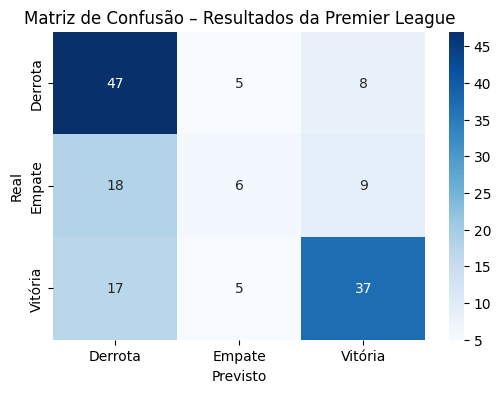

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão com um mapa de calor (heatmap)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Derrota", "Empate", "Vitória"],
            yticklabels=["Derrota", "Empate", "Vitória"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Resultados da Premier League")
plt.show()


### Relatório de Classificação

Utilizei a função `classification_report` para exibir métricas detalhadas sobre o desempenho do modelo em cada classe.

O relatório apresenta:

- **Precisão (precision)**: proporção de acertos entre as previsões daquela classe.
- **Revocação (recall)**: proporção de acertos entre os casos reais daquela classe.
- **F1-score**: média harmônica entre precisão e recall, útil especialmente em casos de classes desbalanceadas.

Essas métricas complementam a matriz de confusão, fornecendo uma avaliação mais completa da performance do modelo em prever vitórias, empates e derrotas.


In [ ]:
# Relatório de classificação
# Mostra métricas importantes para cada classe: precisão, recall e F1-score
print("Relatório de Classificação:\n")
print(classification_report(
    y_test, y_pred,
    target_names=["Derrota", "Empate", "Vitória"]
))


Relatório de Classificação:

              precision    recall  f1-score   support

     Derrota       0.57      0.78      0.66        60
      Empate       0.38      0.18      0.24        33
     Vitória       0.69      0.63      0.65        59

    accuracy                           0.59       152
   macro avg       0.54      0.53      0.52       152
weighted avg       0.57      0.59      0.57       152



### Análise dos Resultados

O modelo de árvore de decisão apresentou desempenho razoável ao prever os resultados das partidas da Premier League, com uma **acurácia geral de 59%**. Abaixo, analiso o comportamento do modelo por classe:

- **Vitória**:
  - A classe "Vitória" apresentou uma precisão de 69% e recall de 63%.
  - Esses valores indicam que o modelo conseguiu identificar bem os padrões que levam à vitória, o que é esperado, já que vitórias costumam estar associadas a métricas fortes como maior posse de bola, mais finalizações e xG elevado.

- **Derrota**:
  - A classe "Derrota" teve precisão de 57% e recall de 78%, o que significa que, embora nem todas as previsões de derrota tenham sido corretas, a maioria dos jogos que realmente terminaram em derrota foram reconhecidos corretamente pelo modelo.
  - Isso pode ser explicado por padrões claros como baixo xG e poucos chutes no alvo.

- **Empate**:
  - A classe "Empate" apresentou os piores resultados, com precisão de apenas 38% e recall de 18%.
  - Isso reflete a maior dificuldade do modelo em capturar o padrão de jogos que terminam empatados, já que esses jogos costumam ter estatísticas equilibradas entre os times, sem destaque claro para um dos lados.
  - Além disso, empates podem surgir por fatores externos imprevisíveis (como falhas individuais ou decisões da arbitragem), que não estão refletidos nos dados numéricos disponíveis.

- **Média geral (macro avg e weighted avg)**:
  - As médias indicam um equilíbrio razoável nas previsões entre as classes, mas também reforçam que a performance está sendo puxada pelos bons resultados em vitórias e derrotas, enquanto os empates seguem como um desafio.

Apesar de algumas limitações, os resultados obtidos são coerentes com o tipo de problema e com as variáveis disponíveis, e mostram que o modelo é útil principalmente para distinguir vitórias e derrotas.


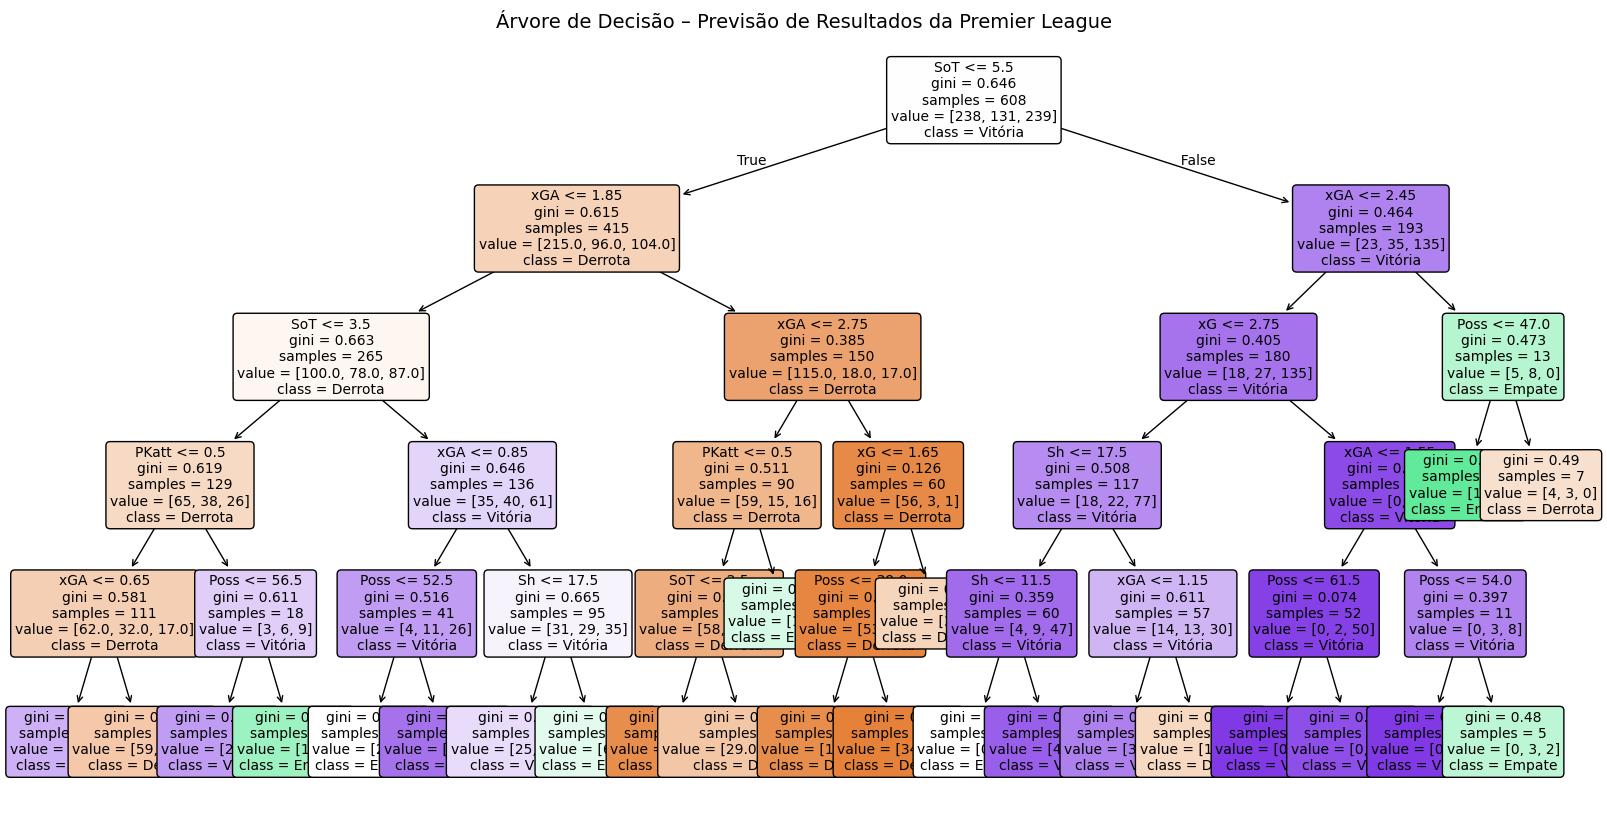

In [ ]:
# Importando ferramenta para visualização
from sklearn.tree import plot_tree

# Configurando a área do gráfico
plt.figure(figsize=(20, 10))

# Plotando a árvore treinada
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["Derrota", "Empate", "Vitória"],
    filled=True,          # Preenche os nós com cores conforme a classe
    rounded=True,         # Bordas arredondadas
    fontsize=10
)

plt.title("Árvore de Decisão – Previsão de Resultados da Premier League", fontsize=14)
plt.show()


### Visualização da Árvore de Decisão

A imagem acima representa a árvore de decisão treinada para prever os resultados das partidas. Cada **nó interno** da árvore mostra uma condição baseada em uma das variáveis do jogo (como `xG`, `Poss`, `Sh`, etc.). A partir dessas condições, o modelo segue **ramos** que se dividem de acordo com o valor da variável até chegar aos **nós folhas**, onde está a previsão final (vitória, empate ou derrota).

A cor dos nós indica a classe predominante naquele ponto, facilitando a interpretação visual: quanto mais intensa a cor, maior a confiança da árvore na decisão tomada naquele nó.

Essa estrutura permite entender, por exemplo, que quando o time tem alto xG, chuta bastante e joga em casa, há maior probabilidade de vitória. Já combinações como baixo xG e poucos chutes tendem a indicar derrotas.

Essa transparência torna a árvore uma excelente ferramenta para apresentação e análise de decisões em contextos reais.



### Como Melhorar a Acurácia em Projetos Futuros

Para obter melhores resultados preditivos em versões futuras deste projeto, algumas melhorias podem ser consideradas:

- **Adicionar novas variáveis**: incluir informações como desempenho recente, escalação, mando de campo detalhado, confronto direto e estatísticas do adversário.

- **Aprimorar os dados existentes**: criar novas métricas a partir das variáveis já disponíveis, como proporção de chutes no alvo ou diferença de xG entre os times.

- **Testar outros algoritmos**: modelos mais complexos como Random Forest, XGBoost ou redes neurais podem aprender padrões mais sutis.

- **Lidar com o desbalanceamento de classes**: usar técnicas de balanceamento para que o modelo não favoreça sempre as classes mais comuns.

- **Fazer tuning de hiperparâmetros**: buscar a configuração ideal do modelo com ferramentas como GridSearchCV.


